# Exercício de Programação: Regressão Linear

***Autor*: Gabriel Negreiros Lima**

## Questão 1 - Regressão Linear com uma variável
Neste exercício, vamos implementar uma regressão linear com uma variável para prever o lucro que poderia ser obtido caso tenhamos decidido montar um food truck.

### 1) O problema
Suponha  que  você  seja  o  CEO  de  uma  franquia  de  restaurantes  e  esteja procurando por um lugar (cidade) para abrir uma nova loja (food truck). A rede já tem caminhões em várias cidades e você tem os dados sobre lucro 
e tamanho da população em cada uma delas. Você gostaria então de usar esses dados para ajudá-lo a selecionar qual deveria ser a próxima cidade a ser escolhida dentro do seu projeto de expansão da marca.

O arquivo “data1.txt” contém o conjunto de dados para o esse problema de regressão linear. A primeira coluna deste arquivo representa a população de uma cidade e a segunda coluna, por sua vez, o lucro de um food truck naquela cidade. Um valor negativo para o lucro indica uma perda. 

In [1]:
# Importação e amostra do dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_paths = ["data1.txt", "data2.txt"]
colums_food = ["population", "profit"]
df_food = pd.read_csv(df_paths[0], delimiter=",", header=None, names=colums_food)
df_food.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### 2) Plotando os dados
Antes  de  iniciar  qualquer  tarefa,  muitas  vezes  é  útil  entender  os  dados visualizando-os. Para este conjunto de dados, iremos plotar um gráfico para visualizá-los, uma vez que ele possui apenas duas propriedades para traçar (lucro e população). (Muitos outros problemas que você encontrará na realidade são multidimensionais e não podem ser plotados em 2D.)

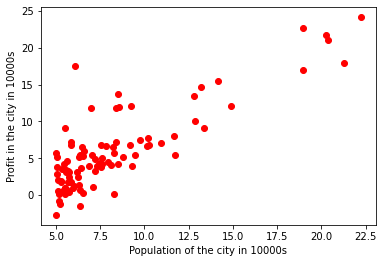

In [2]:
plt.xlabel("Population of the city in 10000s")
plt.ylabel("Profit in the city in 10000s")
plt.scatter(df_food[colums_food[0]], df_food[colums_food[1]], c="red")
plt.show()

### 3) Gradiente Descendente
Nesta  parte,  calcularemos  os  parâmetros  da  regressão  linear  e  a função custo para o conjunto de dados, utilizando uma taxa de aprendizado de 0,01.
- Plotaremos a função custo em relação ao número de iterações para ver o seu decaimento; 
- Depois que terminarmos de calcular os parâmetros da regressão, traçar o ajuste linear, conforme a figura indicada na documentação passada pelo professor

In [3]:
## Funcoes matematicas e auxiliares
# Definicao da funcao hipotese para um polinomio dado os valores das entradas X (vetor)
def h_function(coeffs, X):
    result = 0 
    
    #print(X)
    for index, coeff in enumerate(coeffs):
        if index == 0:
            result += coeff
        else:
            result += coeff * X
    
    return result

# Gera a reta
def evaluated_func(thetas):
    y_d = []
    
    for i, x_i in enumerate(df_food[colums_food[0]]):
        y_d.append(h_function(thetas, x_i))
    return y_d


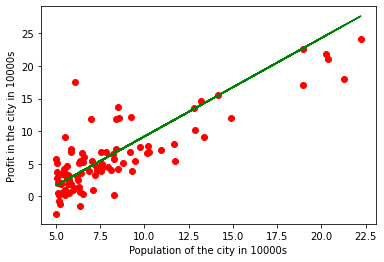

In [4]:
## Define variáveis iniciais
# Funcao desejada y_d
y_d = [] 
thetas = np.array([0, 1])
num_epochs = 500
alpha = 0.01

costs_epoch = []

# Executa iterativamente
for i in range(num_epochs):
    
    y_d = evaluated_func(thetas)
    error = y_d - df_food[colums_food[1]]      
    cost = (error.sum() ** 2)/(2 * len(df_food[colums_food[1]]))
    costs_epoch.append(cost)

    temp = np.zeros(len(thetas))
    for j in range(0, len(y_d)):
        error_temp = (y_d[j] - df_food[colums_food[1]][j])
        for k, _ in enumerate(thetas):
            if k == 0:
                temp[k] += error_temp
            else:
                temp[k] += error_temp *  df_food[colums_food[1]][j]
    thetas = thetas - alpha * (temp/len(df_food[colums_food[0]]))

fig = plt.figure()
plt.xlabel("Population of the city in 10000s")
plt.ylabel("Profit in the city in 10000s")
plt.scatter(df_food[colums_food[0]], df_food[colums_food[1]], c="red")
plt.plot(df_food[colums_food[0]], y_d, c="green")
plt.show()

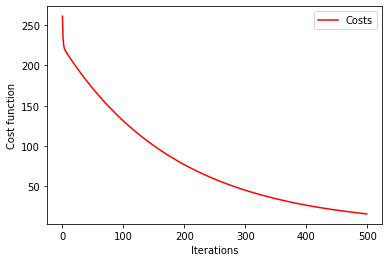

In [5]:
## Funcao custo
epochs_x = np.arange(num_epochs)
plt.plot(epochs_x, costs_epoch, label="Costs", c="red")
plt.xlabel("Iterations")
plt.ylabel("Cost function")
plt.legend()
plt.show()

# Questão 2 - Regressão linear com múltiplas variáveis
Nesta parte, implementaremos a regressão linear com múltiplas variáveis para  prever  o  preço  de  uma  casa.  Supondo que estamos vendendo uma casa  e  queremos  saber  qual  seria  um  bom  preço  de  acordo  com  o mercado. Dessa forma, uma maneira de fazer isso seria coletar informações sobre as casas que foram vendidas  recentemente e fazer um  modelo de previsão de preços.

O  arquivo  “data2.txt”  contém  um  conjunto  de  treinamento  de  preços  de casas  em  Portland,  Oregon.  A  primeira  coluna  representa  o  tamanho  da casa (em metros quadrados), a segunda o número de quartos e terceira o 
preço da casa.

### 1) *Feature Normalization*
Começamos  carregando  e  exibindo  alguns  valores  a  partir  deste  conjunto  de dados.  Olhando para os valores, note que a dimensão relativa ao tamanho das casas é cerca de 1000 vezes maior que o número de quartos. Quando as features  diferem  por uma elevada  ordem de magnitude,  reescalonar a dimensão das features pode fazer a descida do gradiente convergir muito mais rapidamente. 

In [6]:
df_house = pd.read_csv(df_paths[1], delimiter=",", header=None, names=["size", "bedrooms", "price"])
df_house.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [7]:
def normalization(column):
    std_deviation = column.std(axis=0, skipna=True)
    mean = column.mean(axis=0, skipna=True)
    
    normalized_column = column.copy()
    for index, element in enumerate(column):
        normalized_column[index] = (element - mean) / std_deviation
    return normalized_column

size = df_house["size"]
price = df_house["price"]
bedrooms = df_house["bedrooms"]
bedrooms.head()

0    3
1    3
2    3
3    2
4    4
Name: bedrooms, dtype: int64

In [8]:
# Mostra a normalização correta
size_norm = normalization(size)
bedrooms_norm = normalization(bedrooms)
bedrooms_norm.head()

0    0
1    0
2    0
3   -1
4    1
Name: bedrooms, dtype: int64

###  2) Gradiente Descendente
Nesta  parte,  iremos  calcular  os  parâmetros  da  regressão  linear  e  a função  custo  para  o  conjunto  de  dados,  utilizando  diferentes  taxas  de aprendizado para estudar o seu efeito na convergência. 

Plotaremos a função custo em relação ao número de iterações para ver o seu decaimento.

##### Alpha 0.01

In [9]:
def h_multiple_function(coeffs, x_1, x_2):
    result = 0 
    
    for index, coeff in enumerate(coeffs):
        if index == 0:
            result += coeff
        elif index==1:
            result += coeff * x_1
        else:
            result += coeff * x_2
    return result

def evaluated_multiple_func(thetas):
    y_d = []    
    for i, _ in enumerate(size_norm):
        y_d.append(h_multiple_function(thetas, size_norm[i], bedrooms_norm[i]))
    return y_d

In [10]:
## Define variáveis iniciais
# Funcao desejada y_d
y_d = [] 
thetas = np.array([0, 1, 2])
num_epochs = 500
alpha = 0.01

costs_epoch = []

# Executa iterativamente
for i in range(num_epochs):

    y_d = evaluated_multiple_func(thetas)
    error = y_d - df_house["price"]
    cost = (error.sum() ** 2)/(2 * len(price))
    costs_epoch.append(cost)

    temp = np.zeros(len(thetas))
    for j in range(0, len(y_d)):
        error_temp = (y_d[j] - price[j])
        for k, _ in enumerate(thetas):
            if k == 0:
                temp[k] += error_temp
            elif k % 2 == 1:
                temp[k] += error_temp * size_norm[j]
            else:
                temp[k] += error_temp * bedrooms_norm[j]
    thetas = thetas - alpha * (temp/len(size_norm))

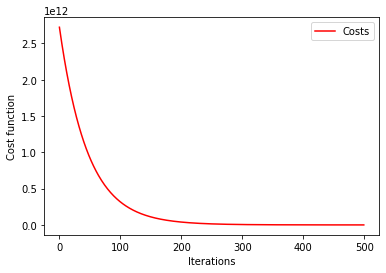

In [11]:
## Funcao custo
epochs_x = np.arange(num_epochs)
plt.plot(epochs_x, costs_epoch, label="Costs", c="red")
plt.xlabel("Iterations")
plt.ylabel("Cost function")
plt.legend()
plt.show()

##### Alpha 0.001 (decaimento mais lento)

In [12]:
## Define variáveis iniciais
# Funcao desejada y_d
y_d = [] 
thetas = np.array([0, 1, 2])
num_epochs = 500
alpha = 0.001

costs_epoch = []

# Executa iterativamente
for i in range(num_epochs):

    y_d = evaluated_multiple_func(thetas)
    error = y_d - df_house["price"]
    cost = (error.sum() ** 2)/(2 * len(price))
    costs_epoch.append(cost)

    temp = np.zeros(len(thetas))
    for j in range(0, len(y_d)):
        error_temp = (y_d[j] - price[j])
        for k, _ in enumerate(thetas):
            if k == 0:
                temp[k] += error_temp
            elif k % 2 == 1:
                temp[k] += error_temp * size_norm[j]
            else:
                temp[k] += error_temp * bedrooms_norm[j]
    thetas = thetas - alpha * (temp/len(size_norm))

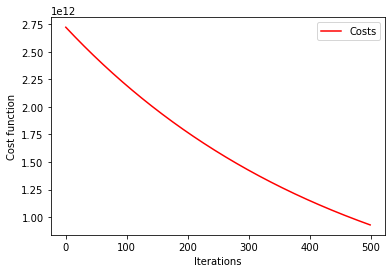

In [14]:
## Funcao custo
epochs_x = np.arange(num_epochs)
plt.plot(epochs_x, costs_epoch, label="Costs", c="red")
plt.xlabel("Iterations")
plt.ylabel("Cost function")
plt.legend()
plt.show()

##### Alpha 0.1 (decaimento brusco)

In [16]:
## Define variáveis iniciais
# Funcao desejada y_d
y_d = [] 
thetas = np.array([0, 1, 2])
num_epochs = 500
alpha = 0.1

costs_epoch = []

# Executa iterativamente
for i in range(num_epochs):

    y_d = evaluated_multiple_func(thetas)
    error = y_d - df_house["price"]
    cost = (error.sum() ** 2)/(2 * len(price))
    costs_epoch.append(cost)

    temp = np.zeros(len(thetas))
    for j in range(0, len(y_d)):
        error_temp = (y_d[j] - price[j])
        for k, _ in enumerate(thetas):
            if k == 0:
                temp[k] += error_temp
            elif k % 2 == 1:
                temp[k] += error_temp * size_norm[j]
            else:
                temp[k] += error_temp * bedrooms_norm[j]
    thetas = thetas - alpha * (temp/len(size_norm))

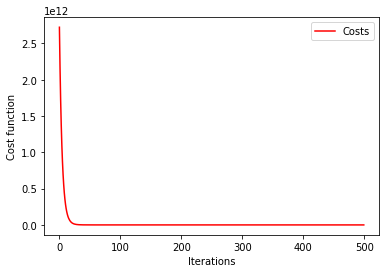

In [17]:
## Funcao custo
epochs_x = np.arange(num_epochs)
plt.plot(epochs_x, costs_epoch, label="Costs", c="red")
plt.xlabel("Iterations")
plt.ylabel("Cost function")
plt.legend()
plt.show()

### 3) Podemos traçar o ajuste linear?

Não podemos com a visualização em duas dimensões, pela dimensão superior da hipótese, que contém duas *features*.

# Equação Normal